# Assignment 2- Network Science
## Statistical Properties of Network

In the following assignment, we have been assigned a task to plot assortativity graphs and calculate its coefficients. Additionally, we have been asked to plot a log-log distribution curve of the degrees and find out the clustring coefficients of the datasets provided.

To perform our task, I am importing the necessary libraries. to perform network related tasks like importing a .gml file, etc. I will use the network library 'networkx'. For mathematical/ array based calculations, I will be using the numpy library, and for plotting visuals, the matplotlib.pyplot library.

In [1]:
import networkx as nx                           #for network analysis
import numpy as np                              #for mathematical analysis
import matplotlib.pyplot as plt                 #for visualization

#### Importing the datasets

Certain datasets have been provided to us as .gml files. They are mainly:
1. C. elegans interactomes: Nodes represent proteins and Edges represent protein-protein interactions in Caenorhabditis elegans (nematode).
2. AstroPhysics Arxiv collaborations: Nodes represent authors of papers submitted to arxiv.org in the AstroPh category and Edges represent co-authorship between two authors.
3. Condensed Matter Arxiv collaborations: Nodes represent authors of papers submitted to arxiv.org in the CondMat category and Edges represent co-authorship between two authors.
4. Kaggle chess players: Nodes represent chess players and Edges represent chess match among the world’s top chess players.
5. Dolphin social network: Nodes represent dolphins and Edges represent frequent associations observed among a group of 62 individuals.
6. European airline network: Nodes represent airlines and Edges represent airline routes among European airports.
7. Facebook friendships: Nodes represent Facebook users and Edges represent their friendship relations collected from survey participants.
8. Florentine families: Nodes represent Florentine families during the Italian Renaissance and Edges represent marriage alliances and business relationships between two families.
9. Game of Thrones coappearances: Nodes represent Game of Thrones characters and Edges represent coappearances of characters in the Game of Thrones series.
10. Internet AS graph: Nodes represent autonomous systems and Edges represent connections between them.
11. Jazz collaboration network: Nodes represent jazz musicians and Edges represent collaborations in bands that performed between 1912 and 1940.
12. 9-11 terrorist network: Nodes represent individuals and Edges represent their known social associations, centered around the hijackers that carried out the September 11th, 2001 terrorist attacks.


Importing these datasets using the networkx function-

In [2]:
AstroPhy=nx.read_gml("C:\\Users\\Aqdus\\Downloads\\data\\data\\graph_AstroPh.gml")
celegansInteractomes=nx.read_gml("C:\\Users\\Aqdus\\Downloads\\data\\data\\graph_celegansInteractomes.gml")
chess=nx.read_gml("C:\\Users\\Aqdus\\Downloads\\data\\data\\graph_chess.gml")
CondMat=nx.read_gml("C:\\Users\\Aqdus\\Downloads\\data\\data\\graph_CondMat.gml")
dolphins=nx.read_gml("C:\\Users\\Aqdus\\Downloads\\data\\data\\graph_dolphins.gml")
eu_airlines=nx.read_gml("C:\\Users\\Aqdus\\Downloads\\data\\data\\graph_eu_airlines.gml")
facebook=nx.read_gml("C:\\Users\\Aqdus\\Downloads\\data\\data\\graph_facebook.gml")
florentine_families=nx.read_gml("C:\\Users\\Aqdus\\Downloads\\data\\data\\graph_florentine_families.gml")
game_thrones=nx.read_gml("C:\\Users\\Aqdus\\Downloads\\data\\data\\graph_game_thrones.gml")
internet=nx.read_gml("C:\\Users\\Aqdus\\Downloads\\data\\data\\graph_internet.gml")
jazz_collab=nx.read_gml("C:\\Users\\Aqdus\\Downloads\\data\\data\\graph_jazz_collab.gml")
terrorists=nx.read_gml("C:\\Users\\Aqdus\\Downloads\\data\\data\\graph_terrorists.gml")

#### Randomizing the Network

Our next task is to randomize the networks. I will be using the random network commands to implement this.

In [3]:
#Astro_random=nx.algorithms.smallworld.random_reference(AstroPhy,connectivity=False)
#celegansInteractomes_random=nx.algorithms.smallworld.random_reference(AstroPhy,connectivity=False)
#chess_random=nx.algorithms.smallworld.random_reference(chess,connectivity=False)
#CondMat_random=nx.algorithms.smallworld.random_reference(CondMat,connectivity=False)
#dolphins_random=nx.algorithms.smallworld.random_reference(dolphins,connectivity=False)
#eu_airlines_random=nx.algorithms.smallworld.random_reference(eu_airlines,connectivity=False)
#facebook_random=nx.algorithms.smallworld.random_reference(facebook,connectivity=False)
#florentine_families_random=nx.algorithms.smallworld.random_reference(florentine,connectivity=False)
#game_thrones_random=nx.algorithms.smallworld.random_reference(game_thrones,connectivity=False)
#internet_random=nx.algorithms.smallworld.random_reference(internet,connectivity=False)
#jazz_collab_random=nx.algorithms.smallworld.random_reference(jazz_collab,connectivity=False)
#terrorists_random=nx.algorithms.smallworld.random_reference(terrorists,connectivity=False)

Due to excessive runtime, the code above could not be implemented fast. Thus, I will be importing the random datasets provided to us additionally and work with them.

In [4]:
AstroPhy_random=nx.read_gml("C:\\Users\\Aqdus\\Downloads\\data_random\\data_random\\graph_AstroPh_random.gml")
celegansInteractomes_random=nx.read_gml("C:\\Users\\Aqdus\\Downloads\\data_random\\data_random\\graph_celegansInteractomes_random.gml")
chess_random=nx.read_gml("C:\\Users\\Aqdus\\Downloads\\data_random\\data_random\\graph_chess_random.gml")
CondMat_random=nx.read_gml("C:\\Users\\Aqdus\\Downloads\\data_random\\data_random\\graph_CondMat_random.gml")
dolphins_random=nx.read_gml("C:\\Users\\Aqdus\\Downloads\\data_random\\data_random\\graph_dolphins_random.gml")
eu_airlines_random=nx.read_gml("C:\\Users\\Aqdus\\Downloads\\data_random\\data_random\\graph_eu_airlines_random.gml")
facebook_random=nx.read_gml("C:\\Users\\Aqdus\\Downloads\\data_random\\data_random\\graph_facebook_random.gml")
florentine_families_random=nx.read_gml("C:\\Users\\Aqdus\\Downloads\\data_random\\data_random\\graph_florentine_families_random.gml")
game_thrones_random=nx.read_gml("C:\\Users\\Aqdus\\Downloads\\data_random\\data_random\\graph_game_thrones_random.gml")
internet_random=nx.read_gml("C:\\Users\\Aqdus\\Downloads\\data_random\\data_random\\graph_internet_random.gml")
jazz_collab_random=nx.read_gml("C:\\Users\\Aqdus\\Downloads\\data_random\\data_random\\graph_jazz_collab_random.gml")
terrorists_random=nx.read_gml("C:\\Users\\Aqdus\\Downloads\\data_random\\data_random\\graph_terrorists_random.gml")

#### Part 1: Plotting the average degree of nearest neighbour knn as a function of vertices degree k

In the function described below, I will be calculating the average degree of nearest neighbors as a function of the degree vertices. My input will be the network data and the string of the filename. I will use the k_nearest_neighbor algorithm for calculating the average neighbor degree as described in the documentation. Alternatively, I could have also ued the average_neighbor_degree algorithm to obtain the same result.

Next, I used the values and keys of the dictionary to graphically show the knn values with respect to the degree. The assortativity relations can be intuitively calculated based on these plots. In order to calculate the proper assortativity coefficient, I used the degree_assortativity_coefficient algorithm from the networkx library. 

In [5]:
def assortativity(name_of_network,name_of_file):
    
    network_dict=nx.algorithms.assortativity.k_nearest_neighbors(name_of_network)     #calculating the knn as a function of degree- obtained as a dictionary
    knn=network_dict.values()                                                         #making a list of only the knn values
    k=network_dict.keys()                                                             #making a list of the degrees
    
    #plot
    plt.scatter(k,knn)                                                                #making a scatter plot for the knn vs degrees
    plt.xlabel("degree")                                                              #labelling the x axis
    plt.ylabel("average degree of nearest neighbors")                                 #labelling the y axis
    plt.title("Plot showing the average degree of the nearest neighbors as a function of the degree for "+name_of_file)          #adding a title to the graph
    plt.show()                                                                        #displaying the plot
    
    #assortativity Coefficient calculations
    coeff=nx.algorithms.assortativity.degree_assortativity_coefficient(name_of_network)      #calculating the assortativity coefficient
    
    return print("The Assortativity coefficient is ",coeff)                                  #displaying the final result

Using the assortativity function to plot the curves and obtain the assortativity coefficient for all the datasets-

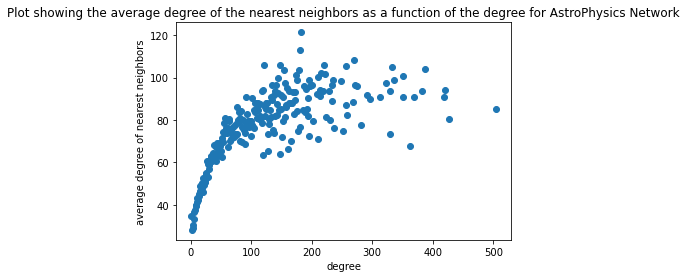

The Assortativity coefficient is  0.2013170612737268


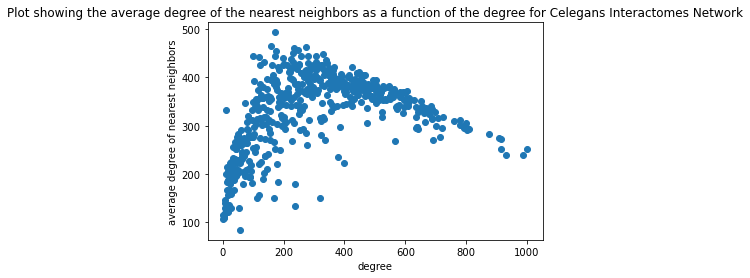

The Assortativity coefficient is  0.15169796960230708


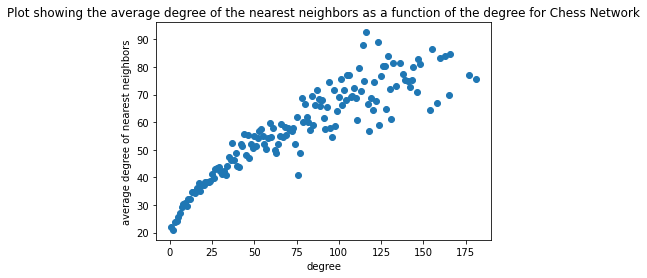

The Assortativity coefficient is  0.3705153782729767


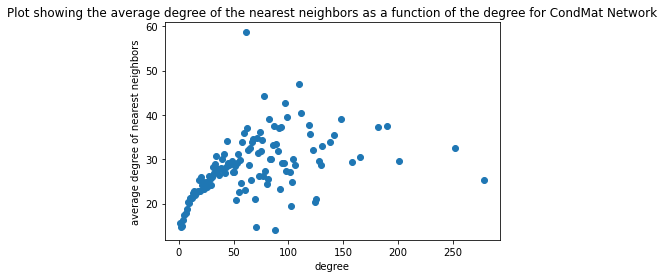

The Assortativity coefficient is  0.12528250398544846


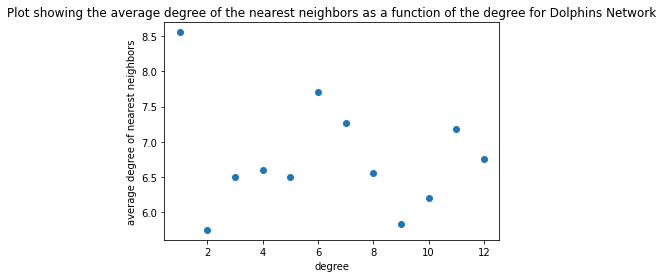

The Assortativity coefficient is  -0.04359402821531252


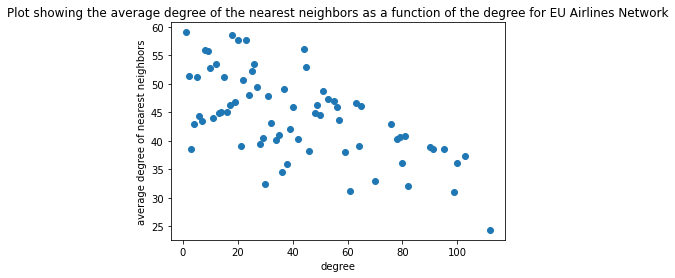

The Assortativity coefficient is  -0.15180413274193827


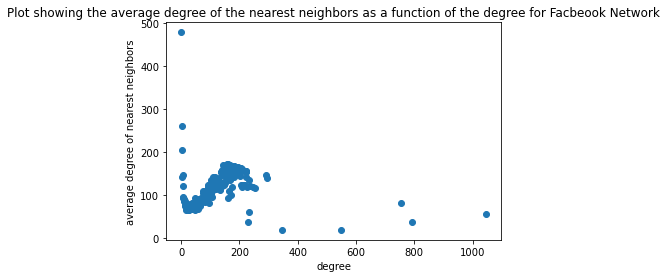

The Assortativity coefficient is  0.0635772291856496


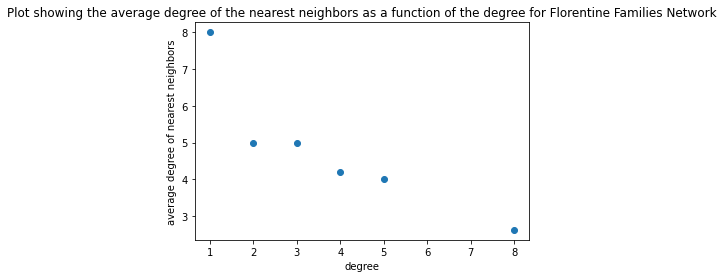

The Assortativity coefficient is  -0.4786286731967932


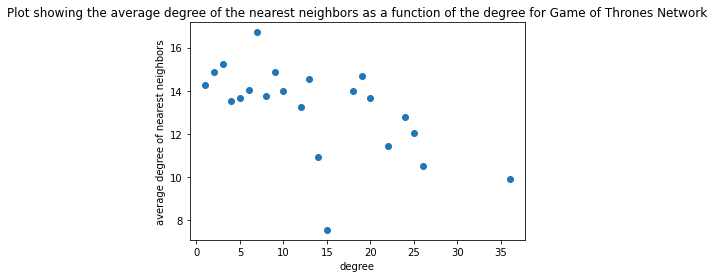

The Assortativity coefficient is  -0.13076968366930292


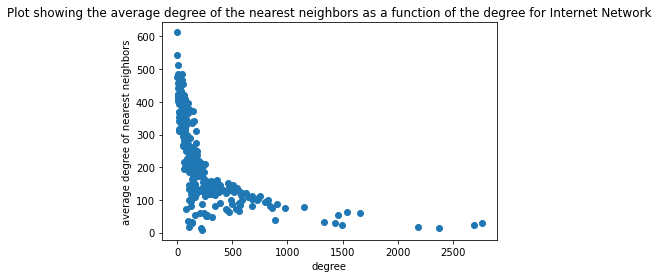

The Assortativity coefficient is  -0.21486656615730243


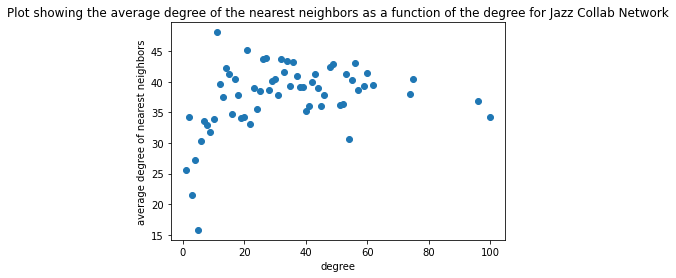

The Assortativity coefficient is  0.02023739927504758


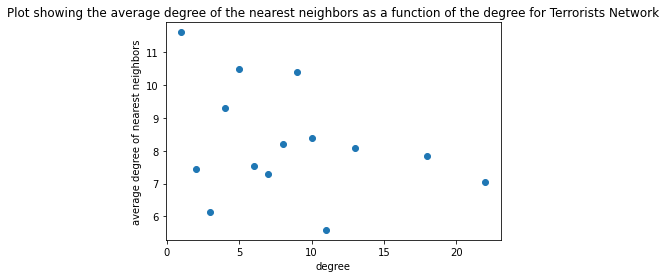

The Assortativity coefficient is  -0.08047566178575724


In [6]:
assortativity(AstroPhy,"AstroPhysics Network")
assortativity(celegansInteractomes,"Celegans Interactomes Network")
assortativity(chess,"Chess Network")
assortativity(CondMat,"CondMat Network")
assortativity(dolphins,"Dolphins Network")
assortativity(eu_airlines,"EU Airlines Network")
assortativity(facebook,"Facbeook Network")
assortativity(florentine_families,"Florentine Families Network")
assortativity(game_thrones,"Game of Thrones Network")
assortativity(internet,"Internet Network")
assortativity(jazz_collab,"Jazz Collab Network")
assortativity(terrorists,"Terrorists Network")

Similarly, plotting and finding values of the same function for the random network files-

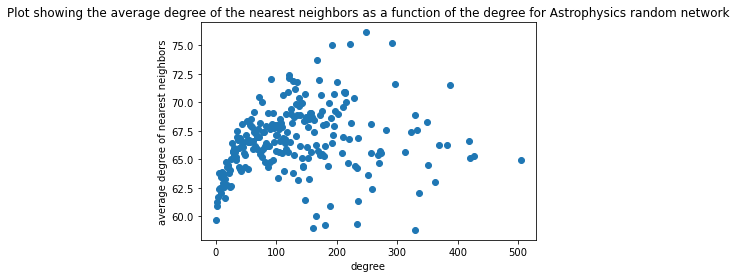

The Assortativity coefficient is  0.016786718783262822


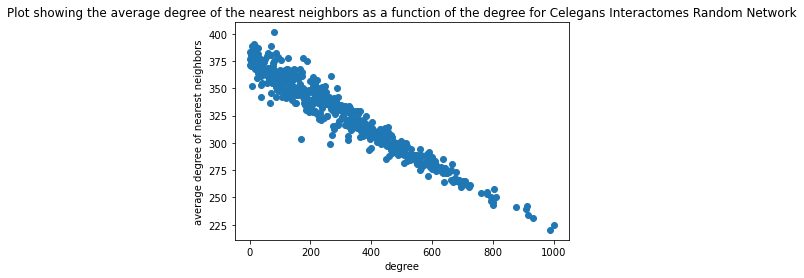

The Assortativity coefficient is  -0.16041270078807618


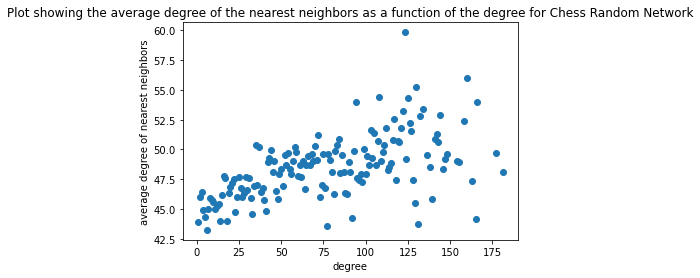

The Assortativity coefficient is  0.04041683046547415


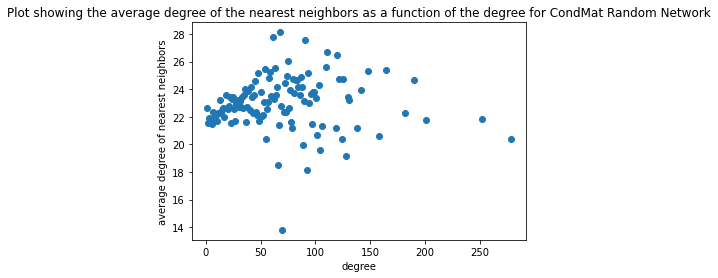

The Assortativity coefficient is  0.01062613662239224


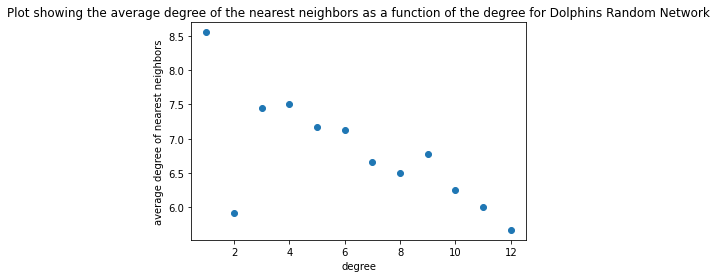

The Assortativity coefficient is  -0.15596767566086744


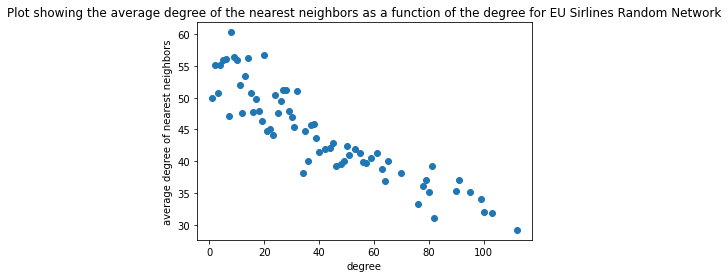

The Assortativity coefficient is  -0.22392762344094433


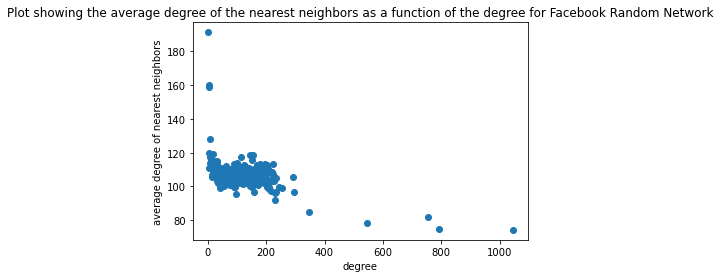

The Assortativity coefficient is  -0.03469329042239884


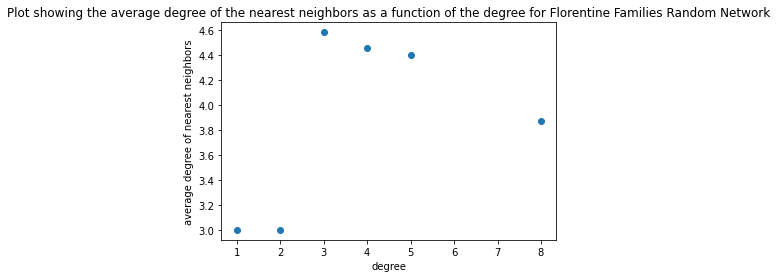

The Assortativity coefficient is  -0.009795191451470063


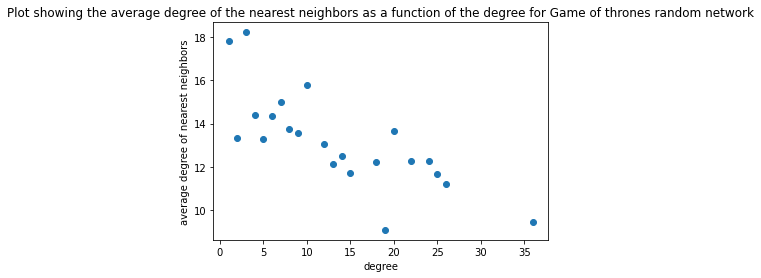

The Assortativity coefficient is  -0.16322657365747306


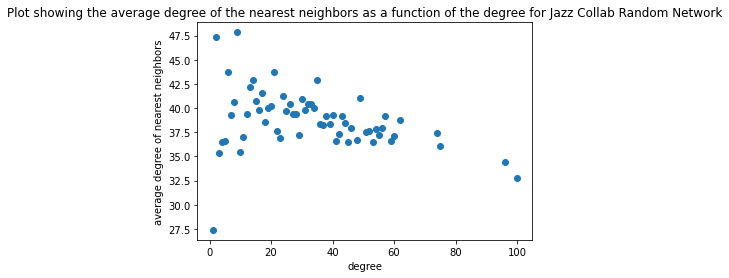

The Assortativity coefficient is  -0.07266930692131274


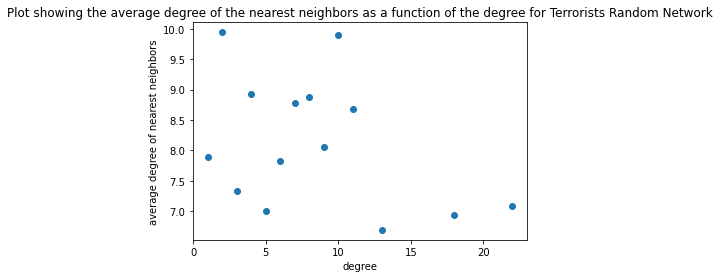

The Assortativity coefficient is  -0.071772419716363


In [7]:
assortativity(AstroPhy_random,"Astrophysics random network")
assortativity(celegansInteractomes_random,"Celegans Interactomes Random Network")
assortativity(chess_random,"Chess Random Network")
assortativity(CondMat_random,"CondMat Random Network")
assortativity(dolphins_random,"Dolphins Random Network")
assortativity(eu_airlines_random,"EU Sirlines Random Network")
assortativity(facebook_random,"Facebook Random Network")
assortativity(florentine_families_random,"Florentine Families Random Network")
assortativity(game_thrones_random,"Game of thrones random network")
#assortativity(internet_random,"Internet Random Network")
assortativity(jazz_collab_random,"Jazz Collab Random Network")
assortativity(terrorists_random,"Terrorists Random Network")

From the plots in the above functions for both real and randomized networks, the assortativity values can be emperically understood. For graphs showing a linearly positive growth of average degree with growing degrees are said to have positive assortativity coefficients, while the ones showing a negative relation have a negative coefficient. For very scattered plots showing no relation, the assortativity nears 0.

Generally, the random networks have less assortativities than the real networks as seen in the graphs above.

#### Part 2: Plotting the Log-Log Degree Distribution graphs with average degree of network depicted

In the next part of the assignment, I am going to be writting a function for plotting the degree distribution graphs for a given network. In the same graph, I will visualize the calculated average degree of the network.

In [8]:
def plot_log_degree_dist(name_of_network,name_of_file):
        
    degree_network=[name_of_network.degree[i] for i in name_of_network.nodes()]             #making a degree list
    
    av_degree=2*name_of_network.number_of_edges()/name_of_network.number_of_nodes()         #formula for average degree of undirected network
    
    plt.figure(figsize=(7,6))                                                               #defining the figure size
    plt.hist(degree_network,
             bins=np.logspace(np.log10(min(degree_network)),np.log10(max(degree_network)),100),
             label=True,
             color="Blue")                                                                    #code for plotting a degree distribution histogram (depicted in blue color). 
    plt.axvline(av_degree,color='Red')                                                        #adding a red line to depict the average degree of the network on the graph
    plt.xlabel("Degree (log scale)")                                                          #labelling the x axis
    plt.ylabel("Frequency (log scale)")                                                       #labelling the y axis
    plt.title("Frequency distribution graph for the degrees in "+name_of_file)                #title of the graph
    plt.xscale('log')                                                                         #setting the scale of the x axis
    plt.yscale('log')                                                                         #setting the scale of the y axis
    return plt.show()                                                                         #displaying the plot

Using the above function to plot the log-log degree distribution for the various given datasets-

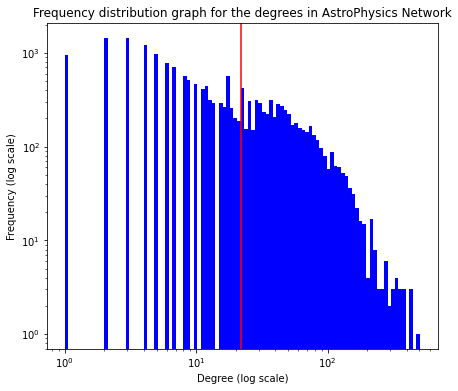

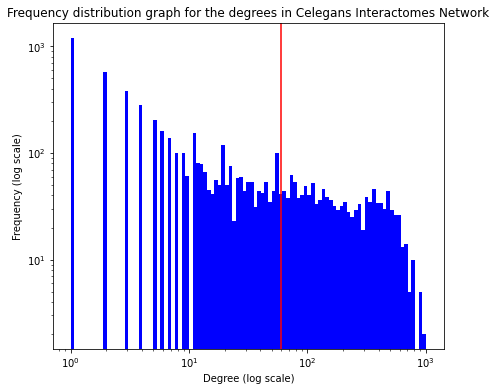

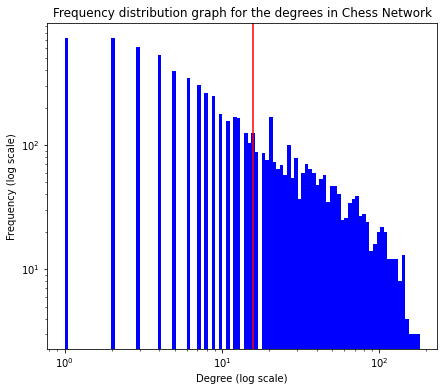

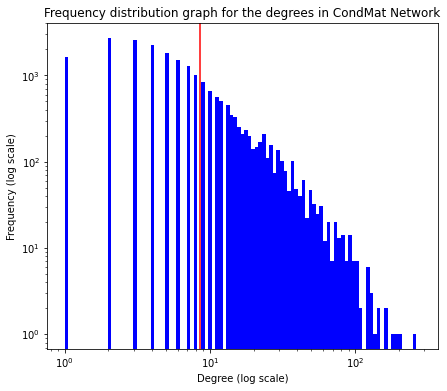

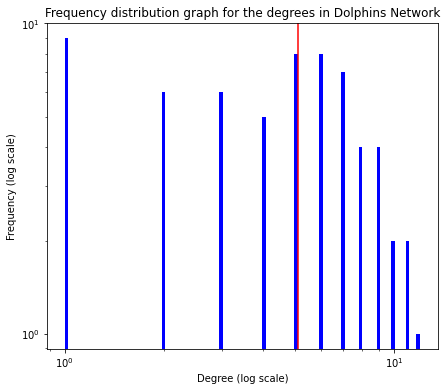

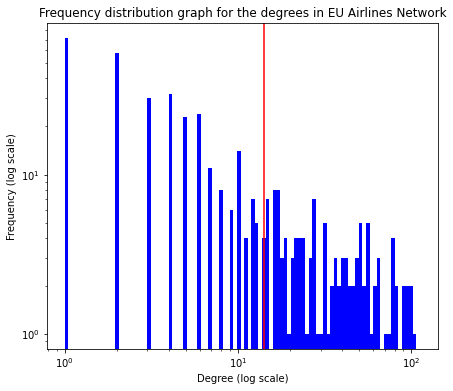

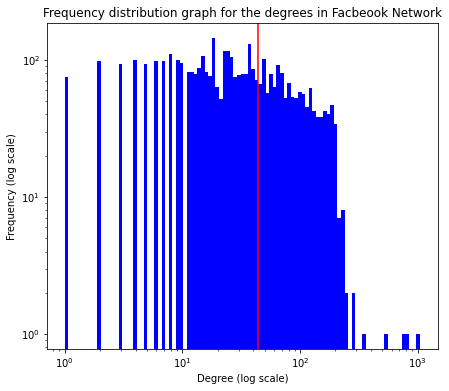

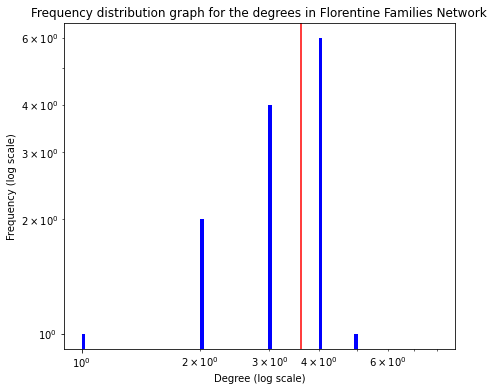

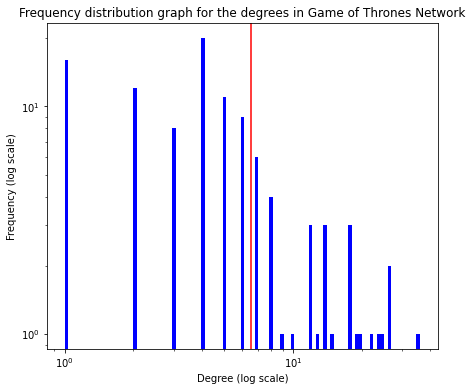

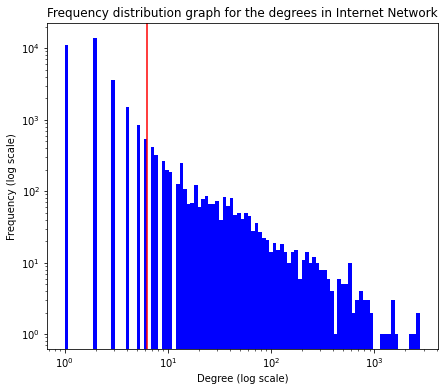

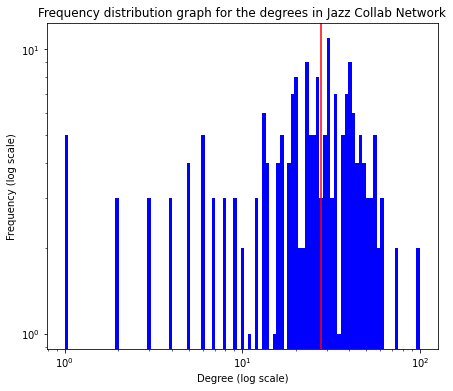

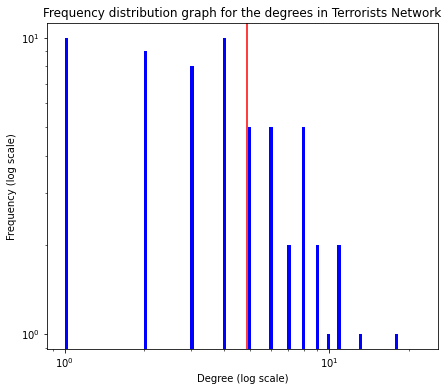

In [9]:
plot_log_degree_dist(AstroPhy,"AstroPhysics Network")
plot_log_degree_dist(celegansInteractomes,"Celegans Interactomes Network")
plot_log_degree_dist(chess,"Chess Network")
plot_log_degree_dist(CondMat,"CondMat Network")
plot_log_degree_dist(dolphins,"Dolphins Network")
plot_log_degree_dist(eu_airlines,"EU Airlines Network")
plot_log_degree_dist(facebook,"Facbeook Network")
plot_log_degree_dist(florentine_families,"Florentine Families Network")
plot_log_degree_dist(game_thrones,"Game of Thrones Network")
plot_log_degree_dist(internet,"Internet Network")
plot_log_degree_dist(jazz_collab,"Jazz Collab Network")
plot_log_degree_dist(terrorists,"Terrorists Network")

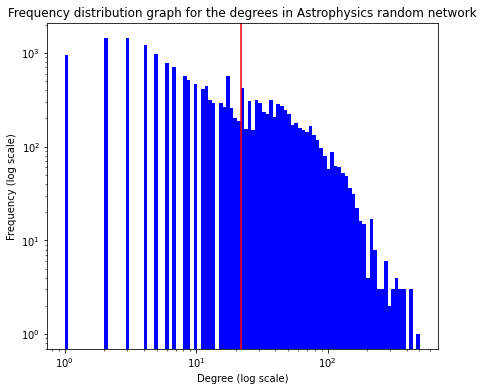

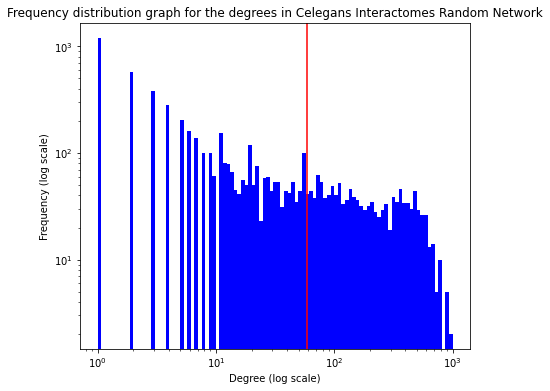

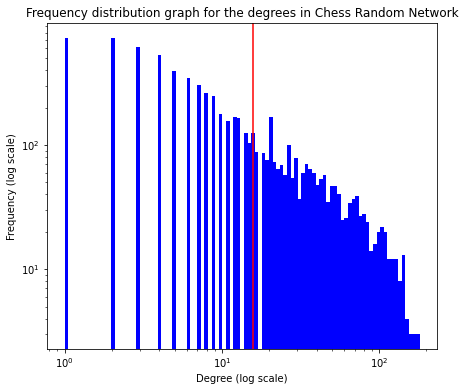

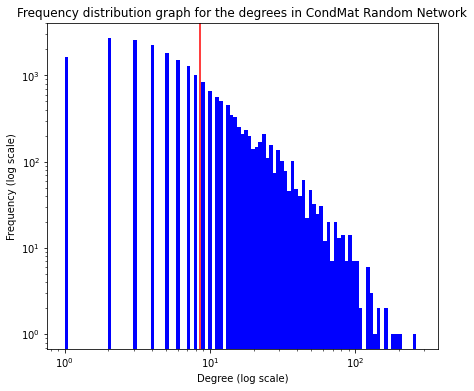

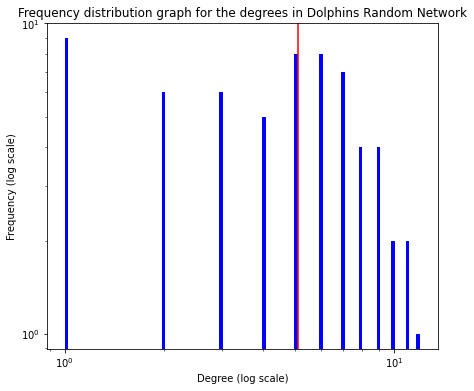

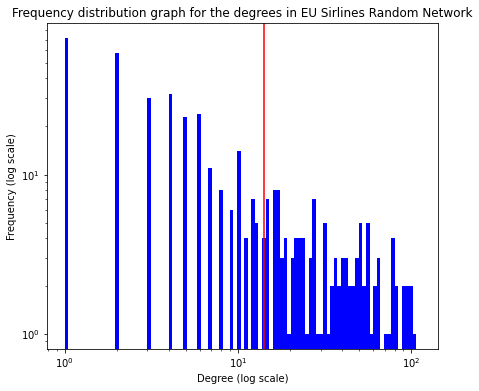

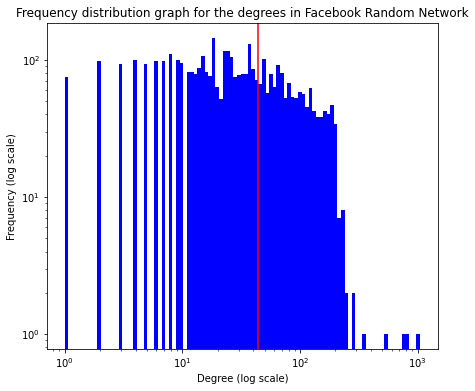

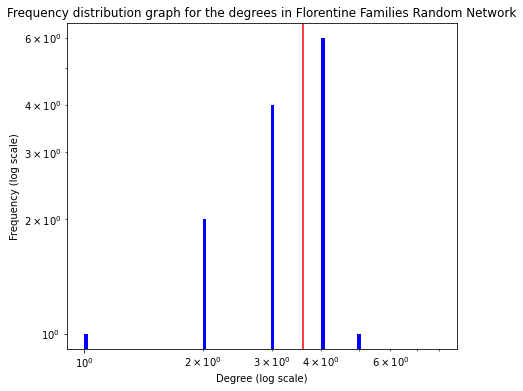

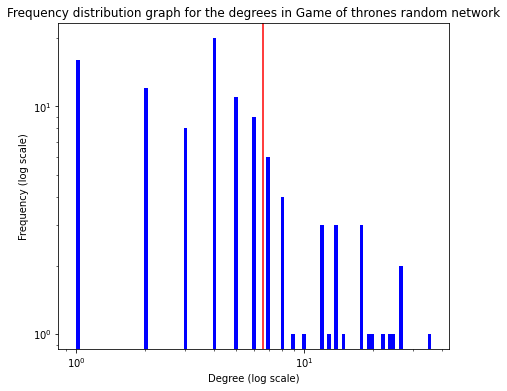

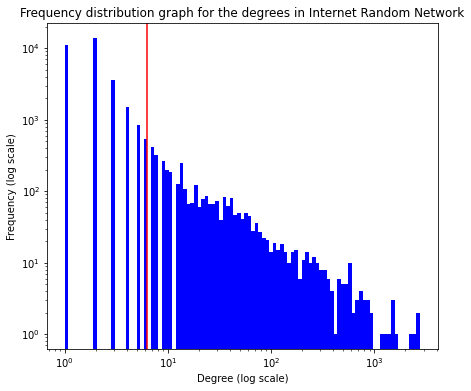

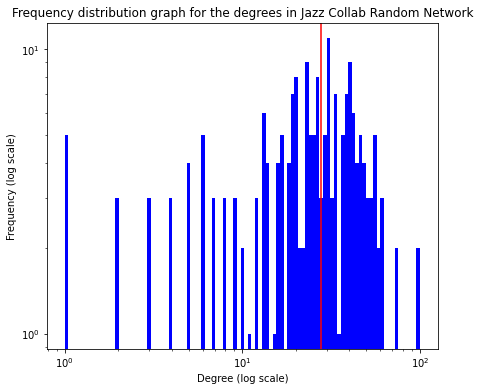

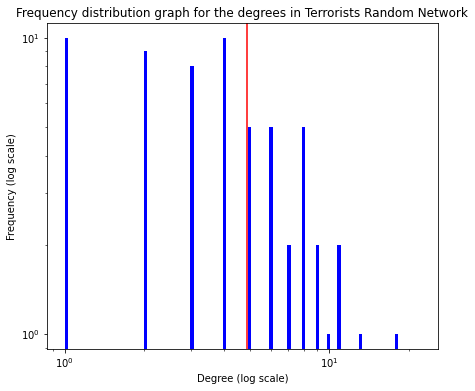

In [10]:
plot_log_degree_dist(AstroPhy_random,"Astrophysics random network")
plot_log_degree_dist(celegansInteractomes_random,"Celegans Interactomes Random Network")
plot_log_degree_dist(chess_random,"Chess Random Network")
plot_log_degree_dist(CondMat_random,"CondMat Random Network")
plot_log_degree_dist(dolphins_random,"Dolphins Random Network")
plot_log_degree_dist(eu_airlines_random,"EU Sirlines Random Network")
plot_log_degree_dist(facebook_random,"Facebook Random Network")
plot_log_degree_dist(florentine_families_random,"Florentine Families Random Network")
plot_log_degree_dist(game_thrones_random,"Game of thrones random network")
plot_log_degree_dist(internet_random,"Internet Random Network")
plot_log_degree_dist(jazz_collab_random,"Jazz Collab Random Network")
plot_log_degree_dist(terrorists_random,"Terrorists Random Network")

Since the degree does not change if we randomise our network, the degree distribution plot look the same for both real and randomized networks.

In the above sets, certain networks require depiction using this log-log scale while the others do not (Eg: florentine families).

#### Part 3: Calculating the clustering coefficients and visualizing them.

Next, I will write a function to calculate the clustering coefficients of the real and random networks. I will store these clustering coefficients in a list for both the real and randomized network. Next within the function, I will plot a scatter graph of the lists of clustering coefficient of the random network as a function of the clustering coefficient of the real network.  

In [11]:
def calculating_clustering_coeff(name_of_network,name_of_random_network,name_of_file):
       
    clust_coeff_real=nx.clustering(name_of_network)                                    #calculating the clustering coefficient of the real network
    ci=clust_coeff_real.values()                                                       #making a list of the clustering coefficients of the real network
    
    clust_coeff_random=nx.clustering(name_of_random_network)                           #calculating the clustering coefficient of the randomized network
    crand=clust_coeff_random.values()                                                  #making a list of the clustering coeffcients of the randomized network
    
    #plotting the graph between real clustering coefficients vs randomized clustering coefficients
    plt.scatter(ci,crand)                                                              #defining a scatter plot
    plt.xlabel("C(i)-Real")                                                            #labelling the x axis
    plt.ylabel("C_rand(i)-Random")                                                     #labelling the y axis
    plt.title("Plot showing the clustering coefficient of the real vs random network for "+name_of_file)    #labelling the graph
    return plt.show()                                                                  #displaying the graph

Using the above function to visualize the graph between the clustering coefficients of real and randomized network-

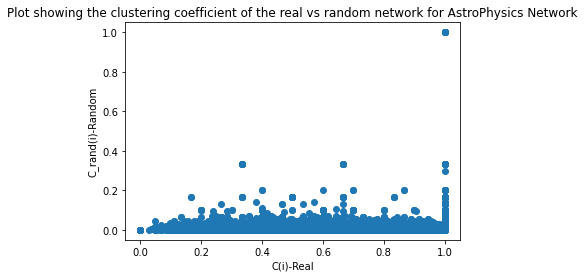

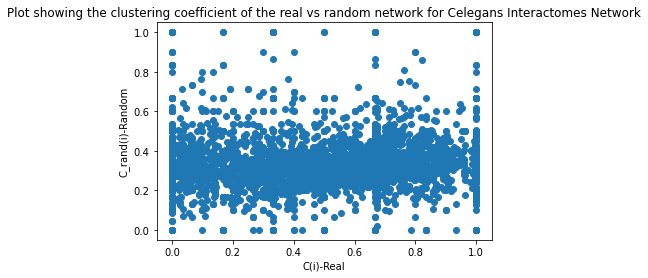

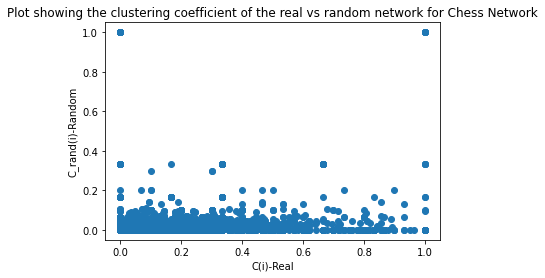

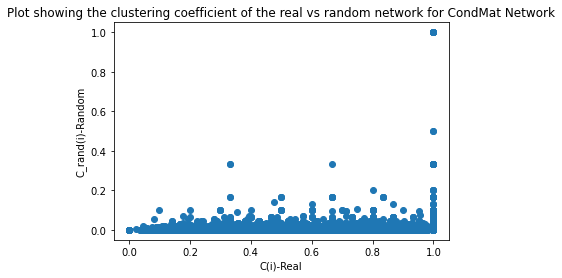

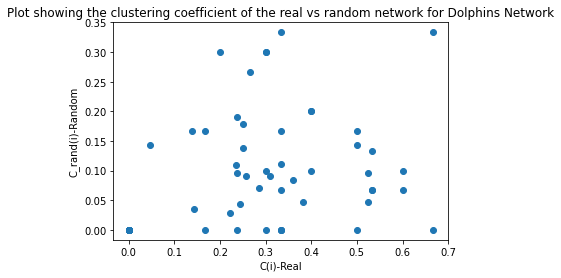

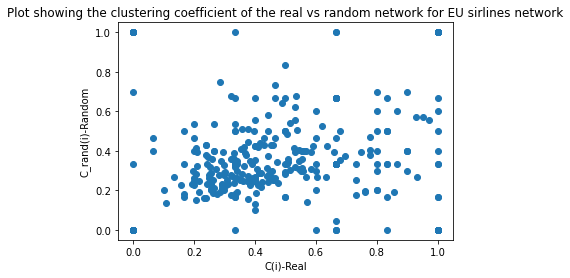

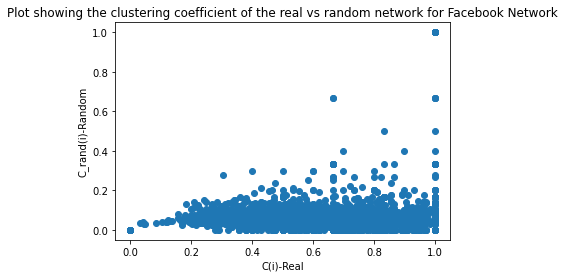

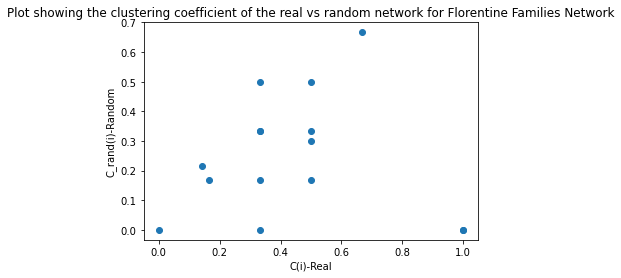

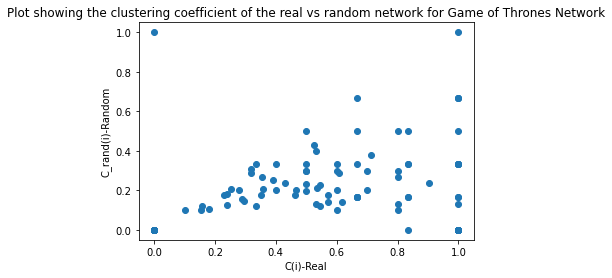

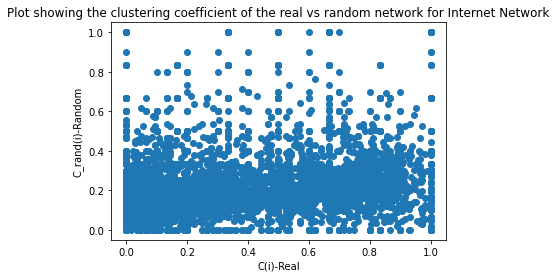

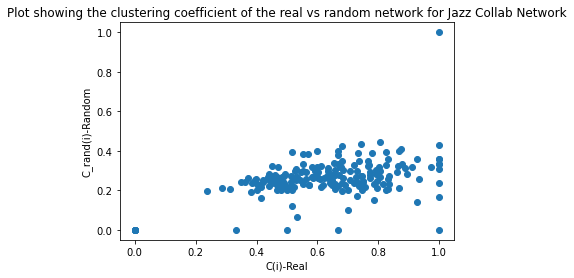

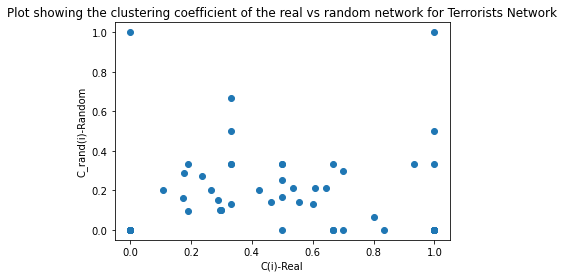

In [12]:
calculating_clustering_coeff(AstroPhy,AstroPhy_random,"AstroPhysics Network")
calculating_clustering_coeff(celegansInteractomes,celegansInteractomes_random,"Celegans Interactomes Network")
calculating_clustering_coeff(chess,chess_random,"Chess Network")
calculating_clustering_coeff(CondMat,CondMat_random,"CondMat Network")
calculating_clustering_coeff(dolphins,dolphins_random,"Dolphins Network")
calculating_clustering_coeff(eu_airlines,eu_airlines_random,"EU sirlines network")
calculating_clustering_coeff(facebook,facebook_random,"Facebook Network")
calculating_clustering_coeff(florentine_families,florentine_families_random,"Florentine Families Network")
calculating_clustering_coeff(game_thrones,game_thrones_random,"Game of Thrones Network")
calculating_clustering_coeff(internet,internet_random,"Internet Network")
calculating_clustering_coeff(jazz_collab,jazz_collab_random,"Jazz Collab Network")
calculating_clustering_coeff(terrorists,terrorists_random,"Terrorists Network")

From the above graphs it is observed that the randomized networks have considerably changed the outlook of the entire network. If it were not so, the graphs would have been a straight linear line at 45 degrees. Unfortunately, a set relation cannot be understood for any of the networks as they have been completely changed while randomising. 